In [1]:
include("../src.jl")

rk23

# Методы Рунге-Кутта

В отличие от метода Эйлера, методы Рунге-Кутты (*Runge-Kutta*) используют информацию о правой части не в одной точке на отрезке $[t_i, t_{i+1}]$, а в нескольких. Подобные методы называют **многоэтапными** (*multistage*).

```{index} метод; Рунге-Кутта
```

Для задачи Коши

```{math}
:label: ode_rk_cauchy

\begin{split}
u' &= f(t, u),\quad t \in (0, T]\\
u(0) &= u_0
\end{split}
```

*явный $m$-этапный метод Рунге-Кутты* определяется следующим образом.

В исходном уравнении производная заменяется разностным соотношением, а правая часть -- взвешенной суммой

```{math}
:label: ode_rk_sum

\frac{y_{i+1} - y_i}{\tau} = \sum_{s=1}^m \sigma_s k_s,
```

где $\sigma_s$, $s=1,\ldots,m$ -- коэффициенты метода, а $k_s$ задаются рекуррентно последовательностью

```{math}
:label: ode_rk_k

\begin{split}
k_1 &= f(t_i, y_i),\\
k_2 &= f(t_i + a_2 \tau, y_i + b_{21} \tau k_1),\\
k_3 &= f(t_i + a_3 \tau, y_i + b_{31}\tau k_1 + b_{32} \tau k_2),\\
\ldots\\
k_m &= f\bigg(t_i + a_m \tau, y_i + \tau\sum_{s=1}^{m-1} b_{m,s}k_s\bigg),
\end{split}
```

где $a_s$ и $b_{sj}$ $s = 2, 3 \ldots, m$, $j=1,2,\ldots,m-1$ -- также коэффициенты метода наряду с $\sigma_s$. Для явного метода матрица $b_{sj}$ является нижнетреугольной с нулевой диагональю.

Коэффициенты $a_s$, $b_{sj}$ и $\sigma_s$ выбираются из соображений точности. Так, для выполнения аппроксимации требуется условие $\sum \sigma_s = 1$.

Набор коэффициентов $\sigma_s$, $a_s$, $b_{sj}$ часто записывают в виде **таблицы Бутчера**

```{math}
\begin{array}{r|cccc}
   0   &        &        &        &           \\
   a_2 & b_{21} &        &        &           \\
   a_3 & b_{31} & b_{32} &        &           \\
\vdots & \vdots & \vdots & \ddots &           \\
   a_m & b_{m1} & b_{m2} & \cdots & b_{m,m-1} \\
   \hline
       & \sigma_1 & \sigma_2 & \cdots & \sigma_m
\end{array}
```

Методы Рунге-Кутты обобщаются на векторный случай задачи Коши

```{math}
\begin{split}
\mathbf{u}' &= \mathbf{f}(t, \mathbf{u}),\quad t \in (0, T]\\
\mathbf{u}(0) &= \mathbf{u}_0
\end{split}
``` 

При этом метод использует те же коэффициенты, что и скалярный аналог

```{math}
\begin{split}
\frac{\mathbf{u}_{i+1} - \mathbf{u}_i}{\tau} &= \sum_{s=1}^m \sigma_s \mathbf{k}_s, \\
\mathbf{k}_1 &= \mathbf{f}(t_i, \mathbf{y}_i),\\
\mathbf{k}_2 &= \mathbf{f}(t_i + a_2 \tau, \mathbf{y}_i + b_{21} \tau \mathbf{k}_1),\\
\mathbf{k}_3 &= \mathbf{f}(t_i + a_3 \tau, \mathbf{y}_i + b_{31}\tau \mathbf{k}_1 + b_{32} \tau \mathbf{k}_2),\\
\ldots\\
\mathbf{k}_m &= \mathbf{f}\bigg(t_i + a_m \tau, \mathbf{y}_i + \tau\sum_{s=1}^{m-1} b_{m,s}\mathbf{k}_s\bigg),
\end{split}
```

В дальнейшем мы будем излагать скалярный случай.

(ode_rk_rk2_derivation)=
## Пример вывода 2-этапного метода

Рассмотрим отдельно два метода. При $m=1$ получаем явный метод Эйлера. При $m=2$ имеем семейство методов

```{math}
\begin{split}
k_1 &= f(t_i, y_i),\\
k_2 &= f(t_i + a_2\tau, y_i + b_{21}\tau k_1),\\
y_{i+1} &= y_i + \tau (\sigma_1 k_1 + \sigma_2 k_2).
\end{split}
```

Исследуем аппроксимацию этого метода. В начале исключим $k_1$ и $k_2$

```{math}
\frac{y_{i+1} - y_i}{\tau} = y_i +\sigma_1 f(t_i, y_i) + \sigma_2 f(t_i + a_2\tau, y_i + b_{21}\tau f(t_i, y_i)).
```

Рассмотрим невязку и определим порядок аппроксимации метода. Для этого подставим в качестве $y_i$ точное решение задачи $u_i$

```{math}
\psi = -\frac{u_{i+1} - u_i}{\tau} + \sigma_1 f(t_i, u_i) + \sigma_2 f(t_i + a_2\tau, u_i + b_{21}\tau f(t_i, u_i)),
```

и разложим все величины по формуле Тейлора в $t_i$.

```{math}
\begin{split}
\frac{u_{i+1} - u_i}{\tau} &= u'(t_i) + \frac{\tau}{2} u''(t_i) + O(\tau^2),\\
f(t_i + a_2\tau, u_i + b_{21}\tau f(t_i, u_i))
    &= f(t_i, u_i) + a_2\tau \frac{\partial f}{\partial t}(t_i, u_i)
       + b_{21}\tau f(t_i, u_i) \frac{\partial f}{\partial u}(t_i, u_i) + O(\tau^2).
\end{split}
```

Согласно исходной задачи {eq}`ode_rk_cauchy`

```{math}
u'' = \frac{\diff f}{\diff t} = \frac{\part f}{\part t} + \frac{\part f}{\part u} u'.
```

Подставим всё в невязку и получим

```{math}
\begin{split}
\psi &= -u'(t_i) \\
     &+ (\sigma_1 + \sigma_2) f(t_i, u_i)\\
     &+ \tau \bigg[
            (\sigma_2 b_{21} - 0.5) f(t_i, y_i) \frac{\part f}{\part u}(t_i, y_i)
            + (\sigma_2 a_2 - 0.5) \frac{\part f}{\part t}(t_i, u_i)
        \bigg] \\
     &+ O(\tau^2).
\end{split}
```

Таким образом, при $\sigma_1 + \sigma_2 = 1$ получаем метод первого порядка аппроксимации. А если дополнительно потребовать $\sigma_2 a_2 = \sigma_2 b_{21} = 0.5$, то получаем семество методов второго порядка аппроксимации.

Одним из таких используемых методов имеет коэффициенты $a_2 = 0.5$, $b_{21} = 0.5$, $\sigma_1 = 0$, $\sigma_2 = 1$, т.е.

```{math}
y_{i+1} = y_i + \tau f(t_i + 0.5\tau, y_i + 0.5 \tau f(t_i, y_i)).
```

Таблица Бутчера для этого метода имеет вид

```{math}
\begin{array}{r|cc}
0   &     &    \\
0.5 & 0.5 &    \\
\hline
    & 0   & 1
\end{array}
```

## Сходимость

Приведём сначала утверждение о сходимости.

```{proof:proposition} Сходимость явных методов Рунге-Кутта
{cite}`SamarskiyGulin1989` Если явный метод Рунге-Кутта аппроксимирует исходное уравнение, то он сходится при $\tau \to 0$, причём порядок точности совпадает с порядком аппроксимации.
```

Отметим, что данное утверждение не связывает этапность метода $m$ и порядок аппроксимации.
В случае методов с числом этапов $1$, $2$, $3$, $4$ порядок аппроксимации (и точности) совпадает с числом этапов, однако, при $m=5$ система на коэффициенты метода уже не является совместной в предположении о пятом порядке аппроксимации. Данное утверждение было доказано Бутчером и носит название *первого барьера*.

```{proof:proposition} Первый барьер Бутчера
Среди явных методов Рунге-Кутты с числом этапов $m = 5$ не существует методов пятого порядка аппроксимации.
```

Так, достижение пятого порядка аппроксимации реализуемо для явного $6$-ти этапного метода Рунге-Кутты. Более того, при поиске методов с большим порядком аппроксимации требуется всё больше этапов и возникают новые барьеры Бутчера. С другой стороны, вместе с этапностью метода растёт и количество вычислений правой части $f(t, u)$. Поэтому, на практике явные методы Рунге-Кутта с порядком $m > 5$ используются реже {cite}`SamarskiyGulin1989`.

## РК4

Наибольшее распространение получил метод 4-го порядка, задаваемый следующей таблицей Бутчера

```{math}
\begin{array}{r|cccc}
0           &             & & & \\
\frac{1}{2} & \frac{1}{2} & & & \\
\frac{1}{2} & 0           & \frac{1}{2} &   & \\
1           & 0           & 0           & 1 & \\
\hline
            & \frac{1}{6} & \frac{1}{3} & \frac{1}{3}& \frac{1}{6}
\end{array}
```

Этот метод также сокращённо называют *РК4* (*RK4*).

На практике каждый метод реализуют отдельно, последовательно вычисляя $k_s$, вместо использования общего алгоритма, принимающего на вход таблицу Бутчера. Оказывается, что такой подход вычислительно более выгоден.

```{proof:algorithm} РК4, явный 4-этапный метод Рунге-Кутты
:::{math}
\begin{split}
k_1 &= f(t_i, y_i), \\
k_2 &= f(t_i + \tau / 2, y_i + \tau k_1 / 2), \\
k_3 &= f(t_i + \tau / 2, y_i + \tau k_2 / 2), \\
k_4 &= f(t_i + \tau, y_i + \tau k_3), \\
y_{i+1} &= y_i + \tau \bigg( \frac{1}{6} k_1 + \frac{1}{3} k_2 + \frac{1}{3} k_3 + \frac{1}{6} k_4 \bigg).
\end{split}
:::
```

```{proof:function} rk4

**Явный метод Рунге-Кутта 4-го порядка**

:::julia
"""
    rk4(problem; nsteps)

Решает задачу Коши `problem` явным 4-этапным методом Рунге-Кутта за `nsteps` шагов.
"""
function rk4(problem::CauchyODEProblem; nsteps::Integer)
    u = Vector{Float64}(undef, nsteps + 1)
    u[1] = problem.u₀
    tstart, tend = problem.bound
    trange = range(tstart, tend; length=nsteps+1)
    τ = step(trange)
    for i in 1:nsteps
        tᵢ, uᵢ = trange[i], u[i]
        
        k₁ = problem.f(tᵢ, uᵢ)
        k₂ = problem.f(tᵢ + τ/2, uᵢ + τ*k₁/2)
        k₃ = problem.f(tᵢ + τ/2, uᵢ + τ*k₂/2)
        k₄ = problem.f(tᵢ + τ, uᵢ + τ * k₃)

        u[i+1] = uᵢ + τ * (k₁ + 2*(k₂ + k₃) + k₄)/6
    end
    return trange, u
end
:::
```

```{proof:demo} Аппроксимация РК4 и явного метода Эйлера
```
```{raw} html
<div class="demo">
```

Рассмотрим решение задачи Коши из {numref}`Демонстрации %s <ode_euler_demo_cauchy>` 4-этапным методом Рунге-Кутты.

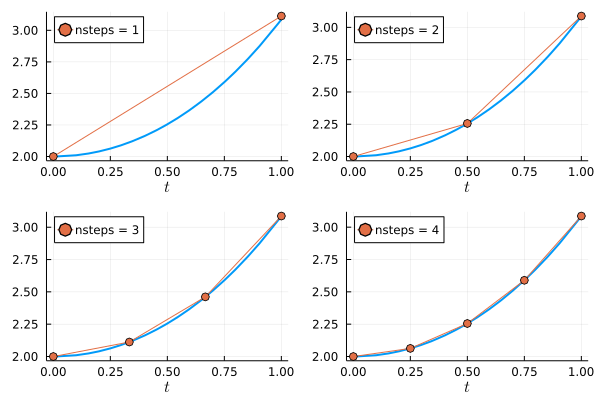

In [2]:
problem = CauchyODEProblem(;
    f=(t, u) -> -u + 2exp(t),
    tstart=0,
    tend=1,
    u₀=2,
)
plt = plot(; xlabel=L"t", leg=:topleft, layout=(2,2))
for (i, n) in enumerate((1, 2, 3, 4))
    t, u = rk4(problem; nsteps=n)
    plot!((t) -> 2cosh(t); label="", line=2, subplot=i)
    plot!(t, u; label="nsteps = $n", marker=:o, subplot=i)
end
plt

Невооруженным глазом видно, насколько лучше РК4 справляется с этой задачей, чем метод Эйлера (см. {numref}`Демонстрация %s <ode_euler_demo_cauchy>`).

Проверим также порядок аппроксимации РК4 и явного метода Эйлера на той же задаче.

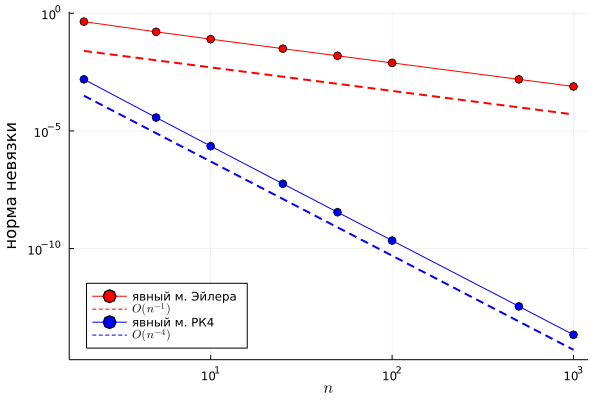

In [3]:
function residual(problem, method::Function, nsteps, exact::Function)
    err = Float64[]
    for n in nsteps
        t, u = method(problem; nsteps=n)
        push!(err, norm(u .- exact.(t), Inf))
    end
    return err
end

problem = CauchyODEProblem(
    f=(t, u) -> -u + 2exp(t),
    tstart=0,
    tend=1,
    u₀=2,
)
uexact(t) = 2cosh(t)

nsteps = [2, 5, 10, 25, 50, 100, 500, 1000]
residual_euler = residual(problem, euler, nsteps, uexact)
residual_rk4 = residual(problem, rk4, nsteps, uexact)

plot(; xaxis=(:log10, L"n"), yaxis=(:log10, "норма невязки"), leg=:bottomleft)
plot!(nsteps, residual_euler; marker=(:o, :red), line=:red, label="явный м. Эйлера")
plot!(nsteps, 5e-2*(nsteps).^(-1); line=(:dash, 2, :red), label=L"O(n^{-1})")
plot!(nsteps, residual_rk4; marker=(:o, :blue), label="явный м. РК4", line=(:blue))
plot!(nsteps, 5e-3*(nsteps).^(-4); line=(:dash, 2, :blue), label=L"O(n^{-4})")

Построение нормы невязки подтверждает, что метод Эйлера обладает первым порядком сходимости, а метод РК4 -- четвёртым.

```{raw} html
</div>
```

## Неявные методы Рунге-Кутта

**Комментарий**. Причиной разработки неявных методов послужило плохое решение (потеря устойчивости) явными методами жёстких систем уравнений. В жёстких системах компоненты решения $\mathbf{u}$ изменяются со значительно разными скоростями. В случае явных систем шаг интегрирования $\tau$ лимитируется самой быстро меняющейся компонентой, что приводит к выбору мелкого шага, а в перспективе к накоплению ошибок на больших масштабах $T$. Для неявных методов, как правило ограничения на шаг более мягкие или почти отсутствуют. В теории решения жёстких систем вводятся специальные определения устойчивости, которые требуют отдельного рассмотрения. Жёсткие системы появляются, например, в задачах прикладной химии по расчёту динамики многостадийных реакций.

Неявными методами Рунге-Кутта называют методы, для которых $k_j$ зависит не только от предыдущих $k$, но и от следующих. То есть,

```{math}
:label: ode_rk_impl_k

k_j = f\bigg(t_i + a_m \tau, y_i + \tau\sum_{s=1}^m b_{j,s}k_s\bigg),\quad j = 1,\ldots,m,
```

но матрица коэффициентов $b_{j,s}$, в отличие от явных методов, уже не имеет нижнетреугольный вид.

Простейшим среди таких методов является **неявный метод Эйлера** (*implicit/backward Euler method*)

```{math}
\frac{y_{i+1} - y_i}{\tau} = f(t_i+\tau, y_{i+1}).
```

Неявные методы требуют в общем случае решения нелинейной системы на $k_j$ {eq}`ode_rk_impl_k`. Однако, в некоторых случаях показано, что достаточно использовать {ref}`метод простой итерации <chapter_nlroot_simpleiter>` для решения такой системы, т.е. явным образом итеративно вычислять 

```{math}
k^{(n+1)}_j = f\bigg(t_i + a_m \tau, y_i + \tau\sum_{s=1}^m b_{j,s}k^{(n)}_s\bigg),\quad j = 1,\ldots,m,
```

пока два приближения системы $k^{(n+1)}$ и $k^{(n)}$ не станут сильно отличаться.

Существуют $m$-этапные неявные методы Рунге-Кутты с порядком аппроксимации $2m$. Хотя, неявный метод Эйлера к таким не относится.